# Measuring activation fronts near death
Tim Tyree<br>
5.7.2021

In [1]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.utils import load_buffer
from lib.routines.return_min_distance import *
from lib.viewer.DomainPlot import ShowDomain

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [2]:
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
dt=0.001
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_218.8.npz'
t=218.8;ds=5.;V_threshold=-50.
txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
print(txt.shape)
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)
comp_dict_topo_full_color=comp_dict_tips
#reidentify the tips to be tracked
img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
t_prev=t;txt_prev=txt.copy()

(200, 200, 18)


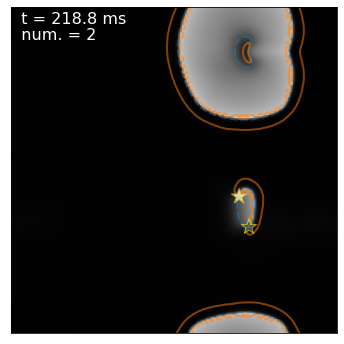

In [4]:
#visualize token death system
x_values=np.array(dict_tips['x'])[:-2]
y_values=np.array(dict_tips['y'])[:-2]
c_values=np.array(dict_tips['pid'])[:-2]
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,
                 fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                 frameno=None,#frameno,
                 save_fn=None,#save_fn,
                 save_folder=None,#save_folder,
                 save=False,#True,
                 annotating=True,
                 axis=[0,img.shape[0],0,img.shape[1]])

In [5]:
#better method: take more data! (after condensing data to a simple readout)
#DONE/DONT(later): look for more reliable way to identify activation fronts... use consistency of position over time??
# HINT: consider looking at mean gating variables from the comp_dict_topo_full_color
#TODO: linearly record data for ^these spiral tips at a high sampling rate (and fine spatial resolution)

In [6]:
#TODO(brainwarmer): check Slides for whether tips move along dVdt levelsets or along V levelsets
#TODO: load/plot system
#TODO: compute each of the the final scalar values needed for the following...
#TODO: test angular difference between cartesion acceleration and acceleration in the direction of the activation front versus time
#TODO: linearly track lesser_arclen of these two death events on a dt=0.001 ms timescale fixed at the basic subpixel resolution
#TODO: test proposition that lesser_arclen always drops shortly annihilating, perhaps on the 0.01~0.02 (ms?) timescale.  
# ^This would support the mechanism of annihilation involving the connection of activation fronts/strings with some tension to contract
# ^This would support using a model of spiral tip dynamics along an activation front to inform our reaction rate calculations
# HINT: consider rate = 1/expected_time_to_death, where the arclength behaves in a predictable way, i.e.
# dsigma_max_dt=foo(sigma_max;relative phase?)

In [7]:
# from inspect import getsource
# print ( getsource(pdict.record_tips_return_txt))
# pdict.record_tips_return_txt?
ntips=len(dict_tips['x'])
assert(ntips>0)

In [8]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
frameno=0
save_every_n_frames=1
# while change_time<=duration:
while ntips>0:
    frameno+=1
    t+=dt
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    if frameno % save_every_n_frames == 0:
        dict_tips=comp_dict_tips(img, dimgdt, t, txt)
        pdict.merge_dict(dict_tips)
        ntips=len(dict_tips['x'])
        print(f"saved at time {t:.3f} ms.",end='\r')

txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

In [9]:
#format/save output pdict
modname=f"{nb_dir}/Data/test_data/steady_death_test_t_{t:.3f}_DT_0.001"
pdict.to_csv_and_json(modname)

{0: (size,t,x,y)=(38522,257.321,144.490,76.002);,
 1: (size,t,x,y)=(1064,219.863,145.999,65.188);,
 2: (size,t,x,y)=(1,218.800,146.708,169.141);,
 3: (size,t,x,y)=(1,218.800,146.806,168.953);,
 4: (size,t,x,y)=(69,219.863,146.017,65.187);,
 5: (size,t,x,y)=(1475,221.269,146.999,65.149);,
 6: (size,t,x,y)=(156,221.269,147.009,65.148);,
 7: (size,t,x,y)=(1617,222.730,147.999,65.093);,
 8: (size,t,x,y)=(319,222.730,148.006,65.093);,
 9: (size,t,x,y)=(1117,223.528,139.922,84.001);,
 10: (size,t,x,y)=(290,223.528,139.924,83.999);,
 11: (size,t,x,y)=(2794,226.032,138.315,85.000);,
 12: (size,t,x,y)=(235,223.974,150.000,65.110);,
 13: (size,t,x,y)=(235,223.974,149.999,65.110);,
 14: (size,t,x,y)=(137,226.032,138.320,84.999);,
 15: (size,t,x,y)=(7512,233.407,146.000,66.568);,
 16: (size,t,x,y)=(375,233.407,146.007,66.575);,
 17: (size,t,x,y)=(23466,256.498,144.534,69.996);,
 18: (size,t,x,y)=(38,256.498,144.553,70.053);,
 19: (size,t,x,y)=(861,257.321,144.492,75.996);,
 20: (size,t,x,y)=(112,2

In [30]:
#TODO: import df from modname
pid_alive_lst=pdict.get_alive_particles()
pid=pid_alive_lst[0]
#OR separate pdict directly without saving
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()

In [83]:
# For darkmode plots
from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

In [77]:
def compute_field_values(pdict,field):
    pid_lst=pdict.get_alive_particles()
    last_particle=pdict[pid_lst[0]]
    values=np.array(last_particle[field])
    return values

def compute_sigma_max_values(pdict,ds=5.,field='lesser_arclen'):
    pid_lst=pdict.get_alive_particles()
    last_particle=pdict[pid_lst[0]]
    scale=ds/last_particle.width #cm/pixel
    sigma_max_values=scale*np.array(last_particle[field])
    return sigma_max_values

def compute_t_values(pdict,ds=5.,field='t'):
    pid_lst=pdict.get_alive_particles()
    last_particle=pdict[pid_lst[0]]
    scale=1.#ms per ms
    t_values=scale*np.array(last_particle[field])
    return t_values

In [78]:
t_values=compute_t_values(pdict,ds=5.,field='t')
greater_mean_V_values=compute_field_values(pdict,field='greater_mean_V')
lesser_mean_V_values=compute_field_values(pdict,field='lesser_mean_V')
greater_mean_curvature_values=compute_field_values(pdict,field='greater_mean_curvature')
lesser_mean_curvature_values=compute_field_values(pdict,field='lesser_mean_curvature')
pdict[0].keys()


dict_keys(['x', 'y', 't', 'lesser_pid', 'lesser_arclen', 'greater_pid', 'greater_arclen', 's1', 's2', 'pid', 'greater_arclen_values', 'lesser_arclen_values', 'greater_mean_V', 'lesser_mean_V', 'greater_mean_curvature', 'lesser_mean_curvature', 'greater_xy_values', 'lesser_xy_values', 'greater_V_values', 'lesser_V_values', 'greater_curvature_values', 'lesser_curvature_values'])

In [81]:
#TODO: compute sigma_max as a function of time 
#HINT: open compute_last_sigma_max
#TODO: make compute_last_sigma_max use the pid_pair of interest explicitely
sigma_max_lesser_values=compute_sigma_max_values(pdict,ds)
sigma_max_greater_values=compute_sigma_max_values(pdict,ds,field='greater_arclen')
# from inspect import getsource
# print ( getsource(compute_last_sigma_max))
x_values=t_values[-1]-t_values

In [ ]:

# #TODO: visualize sigma_max versus time until death
# #TODO: visualize naive distance versus time until death
# plt.plot(x_values,sigma_max_lesser_values,label='lesser arclength',c='C0')
# plt.plot(x_values,sigma_max_greater_values,label='greater arclength',c='C4')
# plt.yscale('log')
# plt.ylabel('')


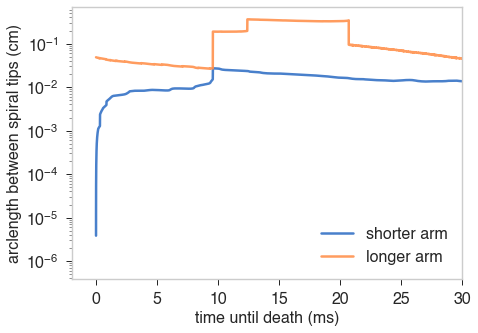

	time between two frames was 0.001 ms


In [134]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))
plt.plot(x_values,sigma_max_lesser_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values,sigma_max_greater_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until death (ms)',fontsize=fontsize)
plt.ylabel('arclength between spiral tips (cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlim([-2,30])
# plt.xlim([1e-3,30])
# plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.show()
print(f"\ttime between two frames was {0.001} ms")

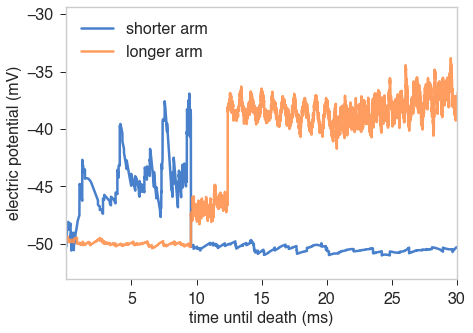

In [138]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_V_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_V_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until death (ms)',fontsize=fontsize)
plt.ylabel('electric potential (mV)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
# plt.xlim([-5,30])
plt.xlim([1e-3,30])
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.show()
# print(f"\ttime between two frames was {0.001} ms")

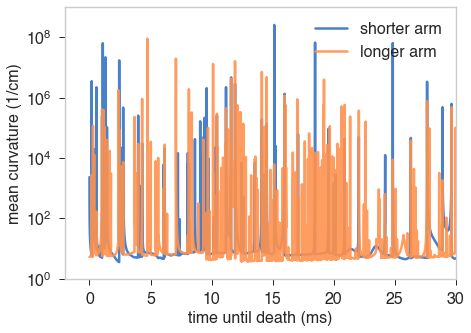

In [139]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_curvature_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_curvature_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until death (ms)',fontsize=fontsize)
plt.ylabel('mean curvature (1/cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim([1e0,1e9])
plt.xlim([-2,30])
# plt.xlim([1e-3,30])
# plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.show()
# print(f"\ttime between two frames was {0.001} ms")

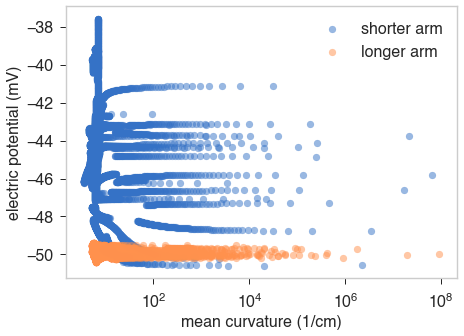

In [153]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
boo=x_values[1:]<8

plt.scatter(lesser_mean_curvature_values[boo],lesser_mean_V_values[boo],label='shorter arm',c='C0',alpha=0.5)
plt.scatter(greater_mean_curvature_values[boo],greater_mean_V_values[boo],label='longer arm',c='C4',alpha=0.5)
plt.xlabel('mean curvature (1/cm)',fontsize=fontsize)
plt.ylabel('electric potential (mV)',fontsize=fontsize)

# plt.scatter(sigma_max_lesser_values[1:][boo],lesser_mean_V_values[boo],label='shorter arm',c='C0',lw=1.5,alpha=0.9)
# plt.scatter(sigma_max_greater_values[1:][boo],greater_mean_V_values[boo],label='longer arm',c='C4',lw=1.5,alpha=0.9)
# plt.xlabel('arclength between spiral tips (cm)',fontsize=fontsize)
# plt.ylabel('electric potential (mV)',fontsize=fontsize)
# plt.xlim([1e-3,1e-2])

# plt.scatter(sigma_max_lesser_values[1:][boo],lesser_mean_curvature_values[boo],label='shorter arm',c='C0',lw=1.5,alpha=0.9)
# plt.scatter(sigma_max_greater_values[1:][boo],greater_mean_curvature_values[boo],label='longer arm',c='C4',lw=1.5,alpha=0.9)
# plt.xlabel('arclength between spiral tips (cm)',fontsize=fontsize)
# plt.ylabel('mean curvature (1/cm)',fontsize=fontsize)

plt.legend(fontsize=fontsize)
# plt.ylim([1e-3,1e5])
plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.show()
# print(f"\ttime between two frames was {0.001} ms")

#plot each scalar measure for all spiral tips versus time
#TODO: color by curvature

In [ ]:
#quantify force direction along activation front
#TODO: compute the 2D unit vector directed from the given particle along its lesser arclen
#TODO: compute the 2D unit vector directed in the direction the first particle position is moving
#TODO: compute the signed_angle = arcsin(cross product magnitude of ^those 2D unit vectors)
#TODO: visualize ^that angle versus time until death

In [31]:
#quantify effect of relative phase on reaction
#TODO: compute the 2D unit vector directed from the given particle along its lesser arclen
#TODO: compute the 2D unit vector directed from the first particle position to the second particle position
#TODO: compute the signed_angle = arcsin(cross product magnitude of ^those 2D unit vectors)
#TODO: visualize ^that angle versus time until death
df.head()

,x,y,t,lesser_pid,lesser_arclen,greater_pid,greater_arclen,s1,s2,pid,greater_mean_V,lesser_mean_V,greater_mean_curvature,lesser_mean_curvature
0,140.046779,83.901063,218.801,1,0.559135,1,0.885723,1.0,5.0,0.0,-37.643938,-51.415689,15.211546,39.132759
1,140.046799,83.901186,218.802,1,0.559134,1,0.885930,1.0,5.0,0.0,-37.607573,-51.416258,15.232568,38.764603
2,140.046819,83.901310,218.803,1,0.559133,1,0.886136,1.0,5.0,0.0,-37.571242,-51.416829,15.253771,38.405954
3,140.046839,83.901433,218.804,1,0.559132,1,0.886342,1.0,5.0,0.0,-37.534949,-51.417405,15.275168,38.058385
4,140.046859,83.901560,218.805,1,0.559130,1,0.886548,1.0,5.0,0.0,-37.498691,-51.417986,15.297149,37.721460


Perhaps, each spiral tip is more like a local oscillator with a relative phase, $\phi_{i,j}(t)$, 
- given by the angle with the shortest line 

In [ ]:
#quantify form of relative phase on reaction
#TODO: compute ^that phase for both particles
#TODO: visualize a few measures that combine phi1 and phi2... phi2-phi1? phi2+phi1?
# QUESTION: Is there a clear pattern that removes the need for the displacement vector, xy2-xy1?
# QUESTION: if so, what ODE might describe the time evolution of this relative phase measure?

In [51]:
i=7 #ith time frame
greater_dict=dict_greater_dict[pid]
XY=np.array(greater_dict['greater_xy_values'])
X,Y=XY[i].T
Z=np.array(greater_dict['greater_xy_values'])[i]

In [ ]:
# Y=greater_dict['y_values']
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();
greater_dict=dict_greater_dict[pid]

greater_dict.keys()

# TODO: compute phase angles between last living spiral tips for all values
then,
- TODO: visualize the phi_1, phi_2, phi_diff, and phi_sum versus time